In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 18, "n": -3, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-2}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(0, 0)

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.36802375 0.29365015] - dtheta : 0.10115931465688033
0 - [StepR, StepZ]: [-0.02359085 -0.02028676]
1 - RZ : [ 6.19201806 -4.49010532] - rhotheta : [ 3.80291665 -1.62922679]
1 - [DeltaR, DeltaZ] : [-0.1610547  -0.17320114] - dtheta : 0.037787972266624115
1 - [StepR, StepZ]: [0.00558637 0.00257023]
2 - RZ : [ 6.19760443 -4.48753509] - rhotheta : [ 3.80002846 -1.62779871]
2 - [DeltaR, DeltaZ] : [-0.01703985 -0.02899794] - dtheta : 0.004010505876924864
2 - [StepR, StepZ]: [ 0.00597171 -0.0082389 ]
3 - RZ : [ 6.20357614 -4.49577399] - rhotheta : [ 3.80791918 -1.62610976]
3 - [DeltaR, DeltaZ] : [0.0003958  0.00018181] - dtheta : 0.00010114859451793023
3 - [StepR, StepZ]: [ 5.73037418e-05 -1.31785770e-04]
4 - RZ : [ 

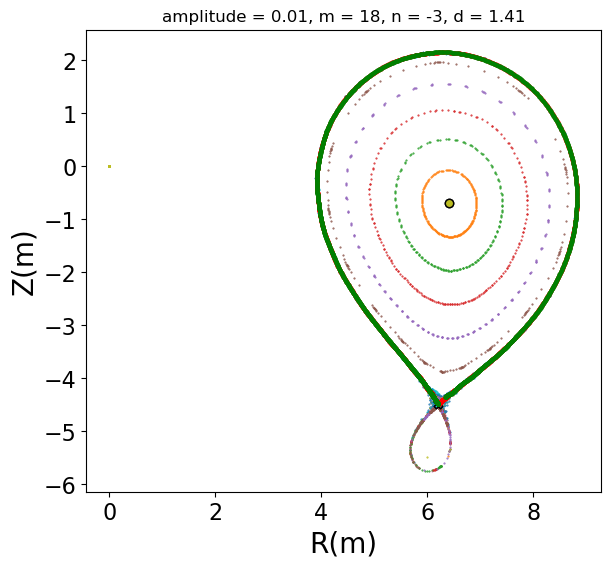

In [3]:
fig = pickle.load(open("manifold_05070828.pkl", "rb"))
ax = fig.gca()

In [4]:
eps_s_1, eps_u_1 = manifold.find_homoclinic()
bounds_1 = manifold.find_bounds(eps_s_1, eps_u_1)

2024-05-09 15:55:31 [info     ] Search for minimum of the linear error succeeded, epsilon = 2.05960e-07
2024-05-09 15:55:31 [info     ] Search for minimum of the linear error succeeded, epsilon = 3.03587e-07
2024-05-09 15:55:31 [debug    ] Guess - 2.8417669398141114e-06, 4.188790607008011e-06
2024-05-09 15:55:31 [debug    ] Bounds - ((2.0595967129152613e-07, 5.889493550919749e-06), (3.03586922011375e-07, 8.681168136027398e-06))
2024-05-09 15:55:31 [debug    ] n_s, n_u - 7, 6
2024-05-09 15:55:32 [debug    ] (2.8417669398141114e-06, 4.188790607008009e-06) - (array([8.49316492, 0.76715986]), array([5.35459693, 1.96370928]), array([ 3.13856799, -1.19654942]))
2024-05-09 15:55:33 [debug    ] (4.3025520078861025e-06, 2.5029637917948402e-05) - (array([8.71282859, 0.23883235]), array([4.05543564, 0.52292927]), array([ 4.65739295, -0.28409692]))
2024-05-09 15:55:34 [debug    ] (1.0435618110224916e-06, 2.0205567966815377e-06) - (array([7.41117312, 1.86470359]), array([6.27502414, 2.14915537]), a

In [ ]:
re = manifold.rfp_u + manifold.clinics[0][0] * manifold.vector_u
manifold.integrate_single(re, 1, 1, ret_jacobian = False, dt = 2*np.pi)
ax
fig

In [ ]:
bounds_1

In [5]:
manifold.clinics

[(1.626914207544604e-06,
  5.894806911300607e-07,
  1.626914207544604e-06,
  array([6.58480266, 2.13233473]),
  array([6.58480266, 2.13233473]))]

In [55]:
bounds_i = np.array(bounds_1)
bounds_i[0][0] = manifold.clinics[-1][1]
bounds_i[1][1] = manifold.clinics[-1][2]
bounds_i = (tuple(bounds_i[0]), tuple(bounds_i[1]))

In [ ]:
bounds_1

((5.894806911300607e-07, 1.685627957103356e-05),
 (1.626914207544604e-06, 4.652103577375743e-05))

In [ ]:
bounds_i

((3.1187737248328478e-06, 1.685627957103356e-05),
 (1.626914207544604e-06, 8.513476661552261e-06))

In [80]:
# i = 1
fund = manifold.fundamental_segment
# guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 5/6), bounds_1[1][0]*np.power(manifold.lambda_u, 5/6)]
guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 5/6), bounds_1[1][0]*np.power(manifold.lambda_u, 5/6)]
print(f"initial guess: {guess_i}")

initial guess: [1.0308143751973173e-06, 2.6603937023316512e-05]


In [82]:
eps_s_i, eps_u_i = manifold.find_homoclinic(*guess_i, bounds = bounds_i, n_s=7, n_u=5, options={"factor": 0.1})

2024-05-09 16:14:30 [debug    ] Guess - 1.0308143751973173e-06, 2.6603937023316512e-05
2024-05-09 16:14:30 [debug    ] Bounds - ((3.1187737248328478e-06, 1.685627957103356e-05), (1.626914207544604e-06, 8.513476661552261e-06))
2024-05-09 16:14:30 [debug    ] n_s, n_u - 7, 5


2024-05-09 16:14:31 [debug    ] (1.0308143751973173e-06, 2.660393702331652e-05) - (array([7.39638329, 1.87225939]), array([7.35486338, 1.89347757]), array([ 0.0415199 , -0.02121818]))
2024-05-09 16:14:32 [debug    ] (0.018087987148803473, 5.631493843571371e-05) - (array([ 6.17908042, -4.3952018 ]), array([6.3113161 , 2.14947958]), array([-0.13223568, -6.54468137]))
2024-05-09 16:14:33 [debug    ] (9.786553195711175e-07, 2.6569020685896263e-05) - (array([7.33245598, 1.90351969]), array([7.35659881, 1.89259805]), array([-0.02414283,  0.01092165]))
2024-05-09 16:14:34 [debug    ] (9.967389913192116e-07, 2.657945949741996e-05) - (array([7.35528002, 1.89261475]), array([7.35607977, 1.89286128]), array([-0.00079975, -0.00024653]))
2024-05-09 16:14:35 [debug    ] (9.96813473532134e-07, 2.6578185850832688e-05) - (array([7.35537252, 1.89256999]), array([7.35614309, 1.89282918]), array([-0.00077057, -0.00025919]))
2024-05-09 16:14:36 [debug    ] (9.955965474910874e-07, 2.6616784504569363e-05) - 

In [83]:
manifold.clinics

[(1.626914207544604e-06,
  5.894806911300607e-07,
  1.626914207544604e-06,
  array([6.58480266, 2.13233473]),
  array([6.58480266, 2.13233473])),
 (8.513476661353759e-06,
  3.1187737248328478e-06,
  8.513476661552261e-06,
  array([4.65217208, 1.48702639]),
  array([4.65217208, 1.48702639])),
 (2.7840434415379187e-06,
  9.537056442773802e-06,
  2.7840434418605286e-06,
  array([5.84288684, 2.10575826]),
  array([5.84288684, 2.10575826])),
 (4.9750362871136556e-06,
  5.512302370132676e-06,
  4.9750362870991476e-06,
  array([5.16353284, 1.86825415]),
  array([5.16353284, 1.86825415])),
 (1.5213509693795375e-05,
  1.8025959160586874e-06,
  1.52135096933387e-05,
  array([4.27086859, 1.00242563]),
  array([4.27086871, 1.00242539])),
 (2.603362566163382e-05,
  1.0198869505602192e-06,
  2.6033625661585915e-05,
  array([7.38345877, 1.87876098]),
  array([7.38345877, 1.87876098]))]

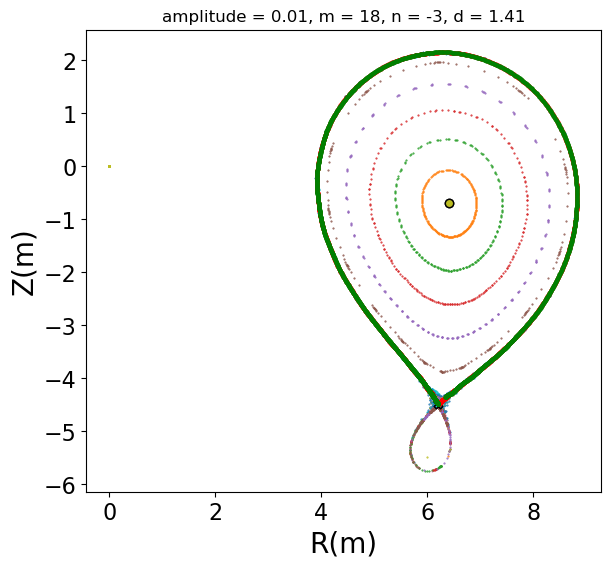

In [84]:
fig = pickle.load(open("manifold_05070828.pkl", "rb"))
ax = fig.gca()

In [62]:
eps_s_i, eps_u_i = manifold.clinics[0][1:3]
# eps_s_i, eps_u_i = bounds_1[0][1], bounds_1[1][1]

n_s, n_u = 6, 6
hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)[:,-1]
hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)[:,-1]
ax.scatter(*hs_i, marker='+', color="purple", zorder=10)
ax.scatter(*hu_i, marker='x', color="blue", zorder=10)

In [29]:
marker = ["o", "s", "*", "^", "v", "<", ">"]

for i in range(4):
    rs, ru = manifold.history[i][:2]
    ax.scatter(*rs, c='purple', marker=marker[i], zorder=10)
    ax.scatter(*ru, c='blue', marker=marker[i], zorder=10)

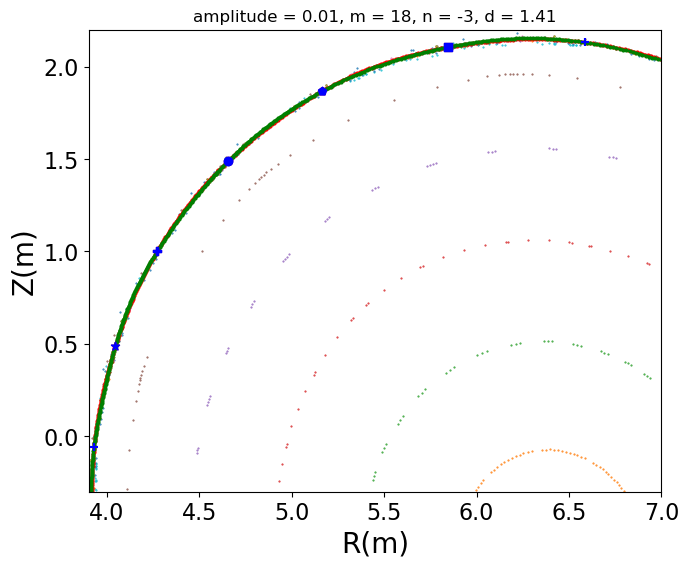

In [86]:
ax.set_xlim(3.9, 7)
ax.set_ylim(-0.3, 2.2)
# ax.set_xlim(3.9, 4.3)
# ax.set_ylim(-0.1, 0.6)
# ax.set_xlim(4, 4.05)
# ax.set_ylim(0.45, 0.51)
fig

In [85]:
marker = ["+", "o", "s", "p", "P", "*", "X", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 8, 8
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="blue", zorder=10)

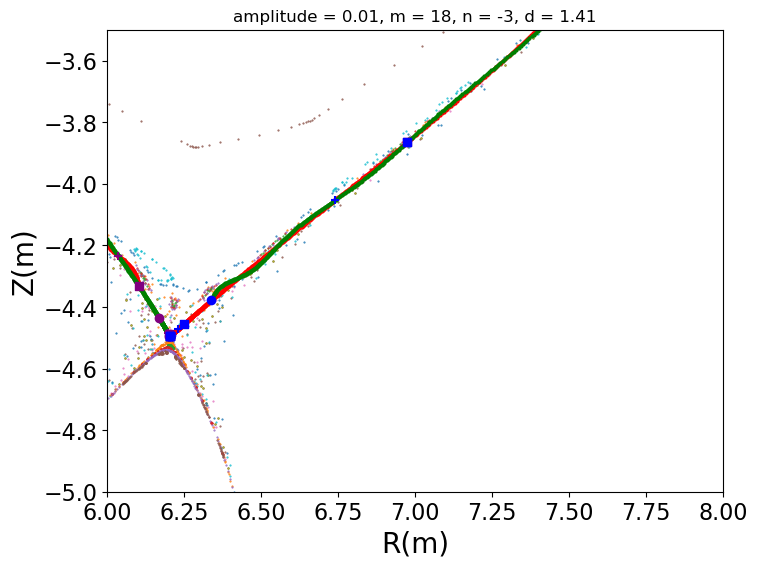

In [65]:
# ax.set_xlim(6, 8)
# ax.set_ylim(-5, -3.5)
# ax.set_xlim(6, 9)
# ax.set_ylim(-5, -1)
# ax.set_xlim(6.42, 6.555)
# ax.set_ylim(-4.32, -4.2)
fig

In [ ]:
ax.scatter(6.49, -4.26)
fig

In [ ]:
pyoproblem.B([6.49, 0., -4.26])

In [ ]:
0.02 * 0.1 * pyoproblem.B([6.49, 0., -4.26])[1]

In [ ]:
bounds_1

In [ ]:
manifold.clinics = [manifold.clinics[i] for i in np.argsort([x[0] for x in manifold.clinics])]

In [ ]:
manifold.clinics

In [ ]:
def resonance_area(self, n_f, n_b, n_transit=3):
    # considering the >_u ordering of the homoclinic points

    print(n_f, n_b)
    
    potential_integrations = []
    endpoints = []
    for homoclinic in self.clinics:

        n_tmp_f, n_tmp_b = 1, 1

        # Forward integration
        rze_forward = homoclinic[-2]
        area_forward = 0
        while n_tmp_f <= n_f:
            rze_end, area_tmp = self.integrate_single(
                rze_forward, 1, direction=1, ret_jacobian=False, integrate_A=True
            )

            if n_tmp_f > n_transit and np.linalg.norm(
                rze_end - self.rfp_s
            ) > np.linalg.norm(rze_forward - self.rfp_s):
                print("Forward integration goes beyond the saddle point.")
                print(
                    f"rfp_s: {self.rfp_s}, rze_end: {rze_end}, rze_forward: {rze_forward}"
                )
                break

            rze_forward = rze_end
            area_forward += area_tmp
            n_tmp_f += 1

        print(f"Forward integration completed with area {area_forward}")

        # Backward integration
        # taking the point found from unstable manifold to go back to the fixedpoint
        rze_backward = homoclinic[-1]
        area_backward = 0
        while n_tmp_b <= n_b:
            rze_end, area_tmp = self.integrate_single(
                rze_backward, 1, direction=-1, ret_jacobian=False, integrate_A=True
            )

            if n_tmp_b > n_transit and np.linalg.norm(
                rze_end - self.rfp_u
            ) > np.linalg.norm(rze_backward - self.rfp_u):
                print("Backward integration goes beyond the saddle point.")
                print(
                    f"rfp_u: {self.rfp_u}, rze_end: {rze_end}, rze_forward: {rze_backward}"
                )
                break

            rze_backward = rze_end
            area_backward += area_tmp
            n_tmp_b += 1

        print(f"Backward integration completed with area {area_backward}")

        potential_integrations.append(area_forward - area_backward)
        endpoints.append([rze_forward, rze_backward])

    return np.array(potential_integrations), endpoints


In [ ]:
areas, re = resonance_area(manifold, 7, 7, 2)

In [ ]:
re

In [ ]:
manifold.rfp_u

In [ ]:
manifold.integrate_single(re[0][0], 1, 1, ret_jacobian = False, integrate_A = True)

In [ ]:
manifold.integrate_single(re[0][1], 1, -1, ret_jacobian = False, integrate_A = True)

In [ ]:
manifold.integrate_single(manifold.rfp_u, 1, -1, ret_jacobian = False, integrate_A = True)

In [ ]:
areas

In [ ]:
[areas[i+1]-areas[i] for i in range(5)]

In [ ]:
n_s, n_u = 5, 6
def evolution(self, eps):
    eps_s, eps_u = eps
    r_s = self.rfp_s + eps_s * self.vector_s
    r_u = self.rfp_u + eps_u * self.vector_u

    try:
        r_s_evolved = self.integrate_single(r_s, n_s, -1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in stable manifold integration : {e}")

    try:
        r_u_evolved = self.integrate_single(r_u, n_u, 1, ret_jacobian = False)
    except Exception as e:
        print(f"Error in unstable manifold integration : {e}")

    return np.linalg.norm(r_s_evolved - r_u_evolved)

In [ ]:
eps_s = np.logspace(np.log(bounds_1[0][0]) / np.log(manifold.lambda_s), 
            np.log(bounds_1[0][1]) / np.log(manifold.lambda_s),
            40, base=manifold.lambda_s)

eps_u = np.logspace(np.log(bounds_1[1][0]) / np.log(manifold.lambda_u), 
            np.log(bounds_1[1][1]) / np.log(manifold.lambda_u),
            40, base=manifold.lambda_u)

es, eu = np.meshgrid(eps_s, eps_u)

In [ ]:
E = np.array([evolution(manifold, [S, U]) for S, U in zip(es.flatten(), eu.flatten())]).reshape(es.shape)

In [ ]:
np.save("stables_eps",es)
np.save("unstables_eps", eu)
np.save("elevation", E)